In [2]:
import pandas as pd
import numpy as np
from scipy import integrate
from pylab import *
from sympy.integrals import laplace_transform
from sympy.integrals import inverse_laplace_transform
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import signal
from tqdm import tqdm
import math

In [3]:
K=1
pre=1
final =0.153
delay = 7.62

tau = linspace(2,3,num=100)
LS = np.zeros(len(tau))
#points = pd.DataFrame({'t': [7.62,8.08,8.69,9.22,11.73,11.85,20], 'd': [1,0.906,0.706,0.52,0.346,0.247,0.153,]})
points = pd.DataFrame({'t': [0,3,5,7.62,8.08,8.69,9.22,11.73,11.85,20,30,40], 'd': [1,1.01,0.99,1,0.906,0.706,0.52,0.346,0.247,0.153,0.153,0.153]})

def convert_time2diamater(t1,value):
        diff = np.zeros(len(t1))
        for i in range(len(t1)):
                diff[i] = pd.Series((t1[i] - value)**2)
    
        for i in range(len(t1)):
            if diff[i] == min(diff):
                out = i
        return y1[out]

for j in range(len(tau)):
    num = [K]
    den = [tau[j],1]
    sys1 = signal.TransferFunction(num,den)
    t1,y1 = signal.step(sys1, T=np.linspace(0,45,100))

    y1 = pre-(pre-final)*y1
    t1 = pd.Series(t1 +delay)
    pre_t = pd.Series(np.linspace(0,delay,100))
    t1 = pre_t.append(t1,ignore_index=True)#
    # t1 = pd.Series(t1)

    y1 = pd.Series(y1)
    pre_y = pd.Series(np.zeros(100) +1)
    y1 = pre_y.append(y1, ignore_index=True)
    
    
    diff = np.zeros(len(points))
    for i in range(len(points)):
        diff[i] = (points.loc[i,'d']-convert_time2diamater(t1,points.loc[i,'t']))**2
    LS[j] = sum(diff)
    
for i in range(len(LS)):
            if LS[i] == min(LS):
                out = i
                print("Optimised value of tau:")
                print(tau[i])

print('LS for best value')
print(LS[out])

Optimised value of tau:
2.292929292929293
LS for best value
0.0090659464314706


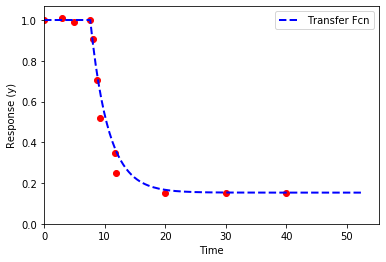

In [4]:
plt.figure(1)
plt.plot(t1,y1,'b--',linewidth=2,label='Transfer Fcn')
plt.scatter(points['t'],points['d'], color='r')
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.ylim(0)
plt.xlim(0)
plt.legend(loc='best')
plt.savefig("Pericyte response LS fit Ischaemia")
plt.show()

  8%|▊         | 2/25 [00:28<05:29, 14.32s/it]

KeyboardInterrupt: 

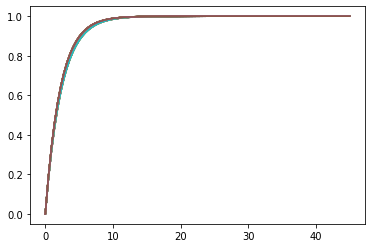

In [3]:
points = pd.DataFrame({'t': [0,3,5,7.62,8.08,8.69,9.22,11.73,11.85,20,30,40], 'd': [1,1.01,0.99,1,0.906,0.706,0.52,0.346,0.247,0.153,0.153,0.153]})
K=1
pre = 1

def convert_time2diamater(t1,y1,value):
        diff = np.zeros(len(t1))
        for i in range(len(t1)):
                diff[i] = pd.Series((t1[i] - value)**2)
    
        for i in range(len(t1)):
            if diff[i] == min(diff):
                out = i
        return y1[out]

def run(tau,final,delay,give=False):
    num = [K]
    den = [tau,1]
    sys1 = signal.TransferFunction(num,den)
    t1,y1 = signal.step(sys1, T=np.linspace(0,45,100))
    
    y1 = pre-(pre-final)*y1
    t1 = pd.Series(t1 +delay)
    pre_t = pd.Series(np.linspace(0,delay,100))
    t1 = pre_t.append(t1,ignore_index=True)#
    # t1 = pd.Series(t1)

    y1 = pd.Series(y1)
    pre_y = pd.Series(np.zeros(100) +1)
    y1 = pre_y.append(y1, ignore_index=True)
    
    
    diff = np.zeros(len(points))
    for i in range(len(points)):
        diff[i] = (points.loc[i,'d']-convert_time2diamater(t1,y1,points.loc[i,'t']))**2
    LS_sum = sum(diff)
    
    if not give:
        return LS_sum
    else:
        return t1,y1

delays = np.arange(7.55,7.8,0.01)
taus = np.arange(2.2,2.4,0.01)
finals = np.arange(0.145,0.16,0.01)

LS_outs = np.zeros(len(delays)*len(taus)*len(finals))
index = {}
counter=0
for delay in tqdm(delays):
    for tau in taus:
        for final in finals:
            LS_outs[counter] = run(tau,final,delay)
            index[counter] = [delay,tau,final]
            counter = counter + 1

In [36]:
for i in range(len(LS_outs)):
    if LS_outs[i] == min(LS_outs):
        print(i)
        print("Optimised value of tau:")
        print(index[i][1])
        opt_tau = index[i][1]
        print("Optimised value of delay:")
        opt_delay = index[i][0]
        print(index[i][0])
        print("Optimised value of final:")
        opt_final = index[i][2]
        print(index[i][2])
        
        print('LS for best value')
        print(LS_outs[i])



57
Optimised value of tau:
2.2799999999999985
Optimised value of delay:
7.56
Optimised value of final:
0.155
LS for best value
0.00910034670307066
97
Optimised value of tau:
2.2799999999999985
Optimised value of delay:
7.569999999999999
Optimised value of final:
0.155
LS for best value
0.00910034670307066
137
Optimised value of tau:
2.2799999999999985
Optimised value of delay:
7.579999999999999
Optimised value of final:
0.155
LS for best value
0.00910034670307066
177
Optimised value of tau:
2.2799999999999985
Optimised value of delay:
7.589999999999999
Optimised value of final:
0.155
LS for best value
0.00910034670307066
217
Optimised value of tau:
2.2799999999999985
Optimised value of delay:
7.599999999999999
Optimised value of final:
0.155
LS for best value
0.00910034670307066
257
Optimised value of tau:
2.2799999999999985
Optimised value of delay:
7.6099999999999985
Optimised value of final:
0.155
LS for best value
0.00910034670307066
297
Optimised value of tau:
2.2799999999999985
O

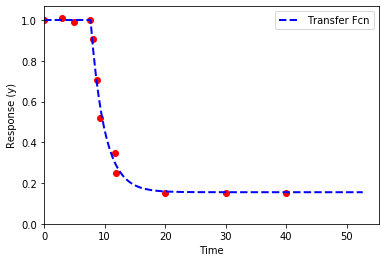

In [44]:
opt_tau = 2.28
opt_delay = 7.68
opt_final = 0.155

t1,y1 = run(opt_tau,opt_final,opt_delay,give=True)
plt.figure(1)
plt.plot(t1,y1,'b--',linewidth=2,label='Transfer Fcn')
plt.scatter(points['t'],points['d'], color='r')
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.ylim(0)
plt.xlim(0)
plt.legend(loc='best')
plt.savefig("Pericyte response LS fit Ischaemia")
plt.show()

In [45]:
df = pd.DataFrame({'t1':t1,'y1':y1})
df.to_csv('response.csv',index=False)
points.to_csv('points.csv',index=False)

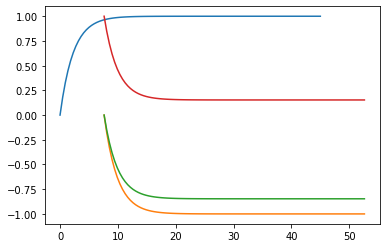

In [13]:
num = [1]
den = [2.29,1]
sys1 = signal.TransferFunction(num,den)
t_TF,y_TF = signal.step(sys1, T=np.linspace(0,45,100))
plt.plot(t_TF,y_TF)
plt.plot((t_TF+7.62),-y_TF)
plt.plot((t_TF+7.62),-(1-0.153)*y_TF)
plt.plot((t_TF+7.62),1-(1-0.153)*y_TF)

y1 = pre-(pre-final)*y_TF
t1 = pd.Series(t_TF +delay)
pre_t = pd.Series(np.linspace(0,delay,100))
t1 = pre_t.append(t1,ignore_index=True)#

y1 = pd.Series(y1)
pre_y = pd.Series(np.zeros(100) +1)
y1 = pre_y.append(y1, ignore_index=True)

# plt.plot(t1,y1)
